# Part 3 - Exploring PREM (to turn in)

The Preliminary Reference Earth Model (Dziewonski and Anderson, 1981) is a model of 1D Earth structure. When working with a 1D model, it's important to acknowledge the limitations of such a model. In the authors own words *An average Earth model, the subject of this work, is a mathematical abstraction. The lateral heterogeneity in the first few tens of kilometres is so large than an average model does not reflect the actual structure at any point.* However throughout much of the mantle (with the exception of the lowermost mantle and the transition zone), the long wavelength deviations from the 1D structure are at the level of a few percent. In the outer core, lateral variations in density are much smaller.

You have been provided a copy of the 1D model, downloaded from the [IRIS Earth Model Collaboration](http://ds.iris.edu/ds/products/emc/). As with many models, the model is provided in a text file. The first row of the file contains a header that describes the format of the remainder of the file. After that, each line contains the values of seismic velocities and densities at a given depth (the first column).

What I'd like you to do is:
1. Write code to read PREM from the data file (you can use np.loadtxt).
2. Plot the variation of density, Vs, and Vp with depth. Please put depth on the vertical axis (with zero depth at the surface) and make sure to label the horizontal axes appropriately.

The PREM model includes anisotropy, and the vertical and horizontal velocities of P and S waves are reported separately as $V_{p,v}$/$V_{p,h}$. You can calculate the isotropic velocities using the Voigt average as:
$$
V_s = \sqrt{\frac{2}{3}V_{sv}^2 + \frac{1}{3}V_{sh}^2} \\
V_p = \sqrt{\frac{4}{5}V_{ph}^2 + \frac{1}{5}V_{pv}^2} 
$$

I suggest that you organize your code into tasks. Put each task (i.e. reading the data) into its own cell. Add a comment to each cell (or a markdown cell) explaining what it does.

The point of this exercise is to (1) develop your skills with python and (2) start to build some familiarity with the properties of Earth's interior.

**Please remember that in addition to the programming exercise, there are written problems related to thermodynamics**

In [1]:
# Load Modules
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read the data
_data = np.loadtxt('PREM_1s_IDV.csv', skiprows=2, delimiter=',')  # File downloaded from IRIS website
_radius = _data[:, 0]  # Intepret data by column
_depth = _data[:, 1]
_density = _data[:, 2]
_Vpv = _data[:, 3]
_Vph = _data[:, 4]
_Vsv = _data[:, 5]
_Vsh = _data[:, 6]

In [3]:
# Compute Vs and Vp Using the Voigt average approach
_Vs = (2.0 / 3.0 * _Vsv**2.0 + 1.0 / 3.0 * _Vsh**2.0)**0.5  # Vs in km/s
_Vp = (4.0 / 5.0 * _Vph**2.0 + 1.0 / 5.0 * _Vpv**2.0)**0.5  # Vp in km/s

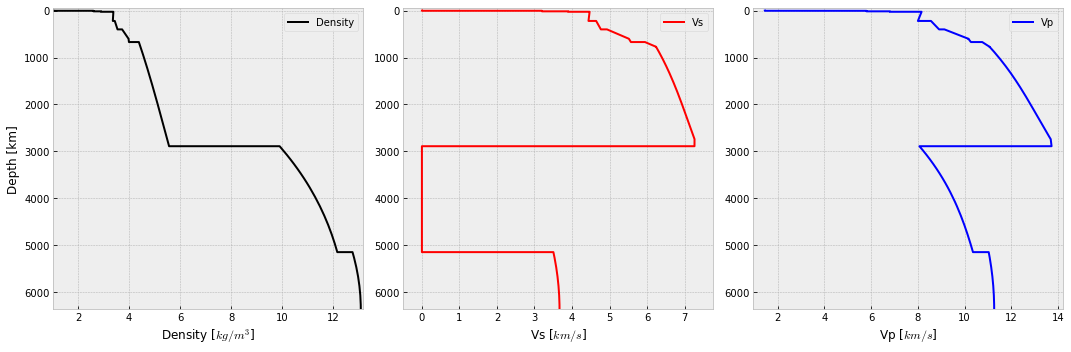

In [4]:
## Plot variation of values with depth
plt.style.use('bmh')  # Use a different style from default
fig, axs = plt.subplots(1,3,figsize=(15, 5))  # Initiate ploting
axs[0].plot(_density, _depth, 'k', label='Density')  # Plot density
axs[0].set_ylim(6371.0, -50.0)
axs[0].set_xlim(_density.min(), _density.max()+0.1)  # Rescale x axis to data range
axs[0].set_xlabel('Density [$kg/m^3$]')
axs[0].set_ylabel('Depth [km]')
axs[0].legend()
axs[1].plot(_Vs, _depth, 'r', label="Vs")  # Plot Vs
axs[1].set_ylim(6371.0, -50.0)
axs[1].set_xlim(_Vs.min()-0.5, _Vs.max()+0.5)
axs[1].set_xlabel('Vs [$km/s$]')
axs[1].legend()
axs[2].plot(_Vp, _depth, 'b', label="Vp")  # Plot Vp
axs[2].set_ylim(6371.0, -50.0)
axs[2].set_xlim(_Vp.min()-0.5, _Vp.max()+0.5)
axs[2].set_xlabel('Vp [$km/s$]')
axs[2].legend()
fig.tight_layout()

3. From the 1D model for density, calculate a profile of the gravitational acceleration using the formula
$\underline{g}(r) = -\frac{G M(r)}{r^2} \hat{\underline{r}}$
Here, $M(r)$ is the mass contained interior to radius $r$ and $G$ is the universal constant of gravitation. Plot the gravitational acceleration versus depth in mks units.
4. Calculate and plot the pressure variation with depth. The pressure gradient with depth is given by $dP/dz=-\rho g$ where $z$ is depth. What pressure do you expect at the core mantle boundary? You can calculate the pressure gradieng from the previous part and then integrate numerically (e.g. using the trapezoid rule) or using routines from `scipy.integrate`.

In [5]:
# Integral for g(r)
# g_i = 4 * pi * G / r_i^2 * integral(r^2 * rho, r), lower bound: 0.0, upper bound: r_i
G = 6.674e-11  # Gravitational constant, m^3kg^(-1)s^(-2)
_y = (_radius * 1e3)**2.0 * (_density * 1e3)  # Integral Kernel, standard unit
_radius_flip = np.flip(_radius)  # flip array so that it starts from r = 0.0
_y_flip = np.flip(_y)
_gravity_flip = np.zeros(_y.size)
for i in range(_y.size):
    if _radius_flip[i] > 1e-16:
        # Radius is not zero to avoid error
        # Use trapezoid rule to integrate
        # Gravity in m/s^2
        _gravity_flip[i] = 4 * np.pi * G / (_radius_flip[i] * 1e3)**2.0 *np.trapz(_y_flip[1: i+1], _radius_flip[1: i+1] * 1e3)
_gravity = np.flip(_gravity_flip)
# Integral for P(r)
# P_i = integral(rho * g, r,), lower bound: r_i, upper_bound: r_out = 6371e3
_y = _density * 1e3 * _gravity
_y_flip = np.flip(_y)  # Integral Kernel
_pressure_flip = np.zeros(_y_flip.size)
for i in range(_y_flip.size):
    _pressure_flip[i] = np.trapz(_y_flip[i: _y_flip.size], _radius_flip[i: _y_flip.size] * 1e3)
_pressure = np.flip(_pressure_flip)  # Pressure, Pa

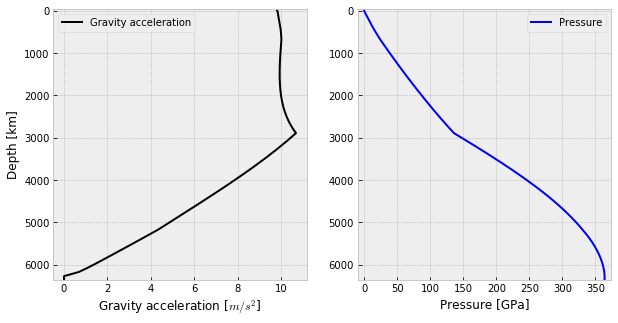

In [6]:
# Plot
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].plot(_gravity, _depth, 'k', label='Gravity acceleration')  # Plot Gravity acceleration
axs[0].set_ylim(6371.0, -50.0)
axs[0].set_xlim(_gravity.min()-0.5, _gravity.max()+0.5)
axs[0].set_xlabel('Gravity acceleration [$m/s^2$]')
axs[0].set_ylabel('Depth [km]')
axs[0].legend()
axs[1].plot(_pressure / 1e9, _depth, 'b', label='Pressure')  # Plot Pressure in GPa
axs[1].set_ylim(6371.0, -50.0)
axs[1].set_xlim(_pressure.min()/1e9-10.0, _pressure.max()/1e9+10.0)
axs[1].set_xlabel('Pressure [GPa]')
axs[1].legend()

In [7]:
# Pressure at CMB
_depth_cmb = 2891  # CMB depth, km
_Pcmb = np.interp(_depth_cmb, _depth, _pressure)  # pressure at CMP, pa
print('Pressure at CMB: %.4e Gpa' % (_Pcmb/1e9))  # Screen output

Pressure at CMB: 1.3585e+02 Gpa
